# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Rationale" data-toc-modified-id="Rationale-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Rationale</a></div><div class="lev2 toc-item"><a href="#Note:" data-toc-modified-id="Note:-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Note:</a></div><div class="lev2 toc-item"><a href="#Imports" data-toc-modified-id="Imports-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Imports</a></div><div class="lev3 toc-item"><a href="#Imports-from-Marc-Huertas-Company's-CNN-code" data-toc-modified-id="Imports-from-Marc-Huertas-Company's-CNN-code-031"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>Imports from Marc Huertas-Company's CNN code</a></div><div class="lev3 toc-item"><a href="#Other-imports" data-toc-modified-id="Other-imports-032"><span class="toc-item-num">0.3.2&nbsp;&nbsp;</span>Other imports</a></div><div class="lev2 toc-item"><a href="#Load-data-about-Illustris-Galaxies-that-were-classified-in-Galaxy-Zoo" data-toc-modified-id="Load-data-about-Illustris-Galaxies-that-were-classified-in-Galaxy-Zoo-04"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Load data about Illustris Galaxies that were classified in Galaxy Zoo</a></div><div class="lev2 toc-item"><a href="#Read-and-format-Illustris-imaging-data-from-Lucifer" data-toc-modified-id="Read-and-format-Illustris-imaging-data-from-Lucifer-05"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Read and format Illustris imaging data from Lucifer</a></div><div class="lev3 toc-item"><a href="#Merge-the-list-of-halo-IDs-with-the-GZ-classification-data" data-toc-modified-id="Merge-the-list-of-halo-IDs-with-the-GZ-classification-data-051"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>Merge the list of halo IDs with the GZ classification data</a></div><div class="lev2 toc-item"><a href="#Examine-formatted-images-to-verify-expected-behaviour" data-toc-modified-id="Examine-formatted-images-to-verify-expected-behaviour-06"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Examine formatted images to verify expected behaviour</a></div><div class="lev3 toc-item"><a href="#Load-saved-datacube-from-disk" data-toc-modified-id="Load-saved-datacube-from-disk-061"><span class="toc-item-num">0.6.1&nbsp;&nbsp;</span>Load saved datacube from disk</a></div><div class="lev3 toc-item"><a href="#Plot-representative-sample-of-extracted-Illustris-images" data-toc-modified-id="Plot-representative-sample-of-extracted-Illustris-images-062"><span class="toc-item-num">0.6.2&nbsp;&nbsp;</span>Plot representative sample of extracted Illustris images</a></div><div class="lev2 toc-item"><a href="#Use-the-CNN-to-classify-the-images" data-toc-modified-id="Use-the-CNN-to-classify-the-images-07"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Use the CNN to classify the images</a></div><div class="lev3 toc-item"><a href="#Merge-CNN-classifications-with-GZ-classifications" data-toc-modified-id="Merge-CNN-classifications-with-GZ-classifications-071"><span class="toc-item-num">0.7.1&nbsp;&nbsp;</span>Merge CNN classifications with GZ classifications</a></div><div class="lev3 toc-item"><a href="#Merge-combined-classifications-with-simulated-halo-data" data-toc-modified-id="Merge-combined-classifications-with-simulated-halo-data-072"><span class="toc-item-num">0.7.2&nbsp;&nbsp;</span>Merge combined classifications with simulated halo data</a></div><div class="lev2 toc-item"><a href="#Generate-distribution-plots" data-toc-modified-id="Generate-distribution-plots-08"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>Generate distribution plots</a></div><div class="lev2 toc-item"><a href="#Examine-galaxy-images-for-which-the-CNN-yields-high-smooth-or-features-probabilities." data-toc-modified-id="Examine-galaxy-images-for-which-the-CNN-yields-high-smooth-or-features-probabilities.-09"><span class="toc-item-num">0.9&nbsp;&nbsp;</span>Examine galaxy images for which the CNN yields high smooth or features probabilities.</a></div>

## Rationale
* Marc Heuertas-Company developed CNN trained on SDSS data.
* Reproduces human classifications with 98% accuracy.
* Test on Illustris dataset and compare with human classifications.

## Note:
Requires an `sshfs` mount of a particular folder on **lucifer**. Contact [Hugh Dickinson](mailto:hdickins@umn.edu) for more details.

## Imports
### Imports from Marc Huertas-Company's CNN code

In [1]:
from train_test_ZOO_Illustris import read_data, validate_convnet_GZOO, run

Using Theano backend.


### Other imports

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib
from matplotlib import pyplot as plt
from IPython.core.display import display
%matplotlib inline

## Load data about Illustris Galaxies that were classified in Galaxy Zoo

In [3]:
# Base directory for HughDickinsonsMisc repository clone
reboBaseDir = '/Users/hughdickinson/Documents/Development/HughDickinsonMisc'

metadataFile = open(repoBaseDir + '/SloanIllustrisNotebooks/galaxyZoo_illustrisMetaData.pkl', mode='rb')
metadataFrame = pickle.load(metadataFile)
metadataFrame.sort_index(inplace=True)

combinedDataFile = open(repoBaseDir + '/SloanIllustrisNotebooks/galaxyZoo_illustrisCombinedData.pkl', mode='rb')
combinedDataFrame = pickle.load(combinedDataFile)
display(combinedDataFrame.columns.values)

array(['priority', 'mass_log_msun', 'log_radius_half', 'log_sfr',
       'absmag_r', 'absmag_b', 'absmag_g', 'absmag_i', 'absmag_k',
       'absmag_u', 'absmag_v', 'absmag_z', 'image_basename', 'num_smooth',
       'num_features', 'num_artifact', 'num_edgeon', 'num_faceon',
       'p_smooth', 'p_features', 'p_smooth_plus_artifact',
       'p_features_plus_artifact', 'p_artifact',
       'p_smooth_with_artifact_in_denominator',
       'p_features_with_artifact_in_denominator', 'is_edge_on',
       'is_features_and_edge_on'], dtype=object)

## Read and format Illustris imaging data from Lucifer
Formatting entails extraction of a 207x207 square array of pixels from the centre of the original 423x423 PNG image before reducing the resolution by a factor of 3 to yield a 69x69 pixel image.

In [4]:
dryrun = True
haloIdsList = read_data(repoBaseDir + '/IllustrisConvNet/Data', maxim=None, halo_ids=metadataFrame.index.values, dryrun=dryrun)

Maximum number of images to process is 17046
6891 6891
Running in dryrun mode. Only an ordered list of halo IDs will be generated.
Accepted 1 of 17046 images (skipped 0 = 1 - 1)...
Accepted 501 of 17046 images (skipped 0 = 501 - 501)...
Accepted 1001 of 17046 images (skipped 0 = 1001 - 1001)...
Accepted 1501 of 17046 images (skipped 0 = 1501 - 1501)...
Accepted 2001 of 17046 images (skipped 0 = 2001 - 2001)...
Accepted 2501 of 17046 images (skipped 0 = 2501 - 2501)...
Accepted 3001 of 17046 images (skipped 0 = 3001 - 3001)...
Accepted 3501 of 17046 images (skipped 0 = 3501 - 3501)...
Accepted 4001 of 17046 images (skipped 0 = 4001 - 4001)...
Accepted 4501 of 17046 images (skipped 0 = 4501 - 4501)...
Accepted 5001 of 17046 images (skipped 0 = 5001 - 5001)...
Accepted 5501 of 17046 images (skipped 0 = 5501 - 5501)...
Accepted 6001 of 17046 images (skipped 0 = 6001 - 6001)...
Accepted 6501 of 17046 images (skipped 0 = 6501 - 6501)...
Accepted 7001 of 17046 images (skipped 0 = 7001 - 7001)

In [5]:
print (len(haloIdsList))
print(haloIdsList[0:10])

17046
[['163950'
  '/Volumes/lucifer_willett_data/gz4/illustris/png/subdir_007/synthetic_image_163950_camera_2_bg_0.png']
 ['161379'
  '/Volumes/lucifer_willett_data/gz4/illustris/png/subdir_007/synthetic_image_161379_camera_3_bg_1.png']
 ['173538'
  '/Volumes/lucifer_willett_data/gz4/illustris/png/subdir_007/synthetic_image_173538_camera_1_bg_1.png']
 ['173539'
  '/Volumes/lucifer_willett_data/gz4/illustris/png/subdir_007/synthetic_image_173539_camera_2_bg_3.png']
 ['167871'
  '/Volumes/lucifer_willett_data/gz4/illustris/png/subdir_007/synthetic_image_167871_camera_1_bg_3.png']
 ['163941'
  '/Volumes/lucifer_willett_data/gz4/illustris/png/subdir_007/synthetic_image_163941_camera_0_bg_0.png']
 ['163936'
  '/Volumes/lucifer_willett_data/gz4/illustris/png/subdir_007/synthetic_image_163936_camera_0_bg_1.png']
 ['51814'
  '/Volumes/lucifer_willett_data/gz4/illustris/png/subdir_007/synthetic_image_51814_camera_3_bg_3.png']
 ['161368'
  '/Volumes/lucifer_willett_data/gz4/illustris/png/subdir

### Merge the list of halo IDs with the GZ classification data
Begin by creating a `pandas.DataFrame` from the list of halo IDs and corresponding files.

In [6]:
imageBasenameList = [datum[1].split('/')[-1].split('.')[0] for datum in haloIdsList]
imageDetailsFrame = pd.DataFrame.from_dict({'halo_id' : [datum[0] for datum in haloIdsList], 
                                            'file_path' : [datum[1] for datum in haloIdsList],
                                            'file_basename' : imageBasenameList})
display(imageDetailsFrame)

,file_basename,file_path,halo_id
0,synthetic_image_163950_camera_2_bg_0,/Volumes/lucifer_willett_data/gz4/illustris/pn...,163950
1,synthetic_image_161379_camera_3_bg_1,/Volumes/lucifer_willett_data/gz4/illustris/pn...,161379
2,synthetic_image_173538_camera_1_bg_1,/Volumes/lucifer_willett_data/gz4/illustris/pn...,173538
3,synthetic_image_173539_camera_2_bg_3,/Volumes/lucifer_willett_data/gz4/illustris/pn...,173539
4,synthetic_image_167871_camera_1_bg_3,/Volumes/lucifer_willett_data/gz4/illustris/pn...,167871
5,synthetic_image_163941_camera_0_bg_0,/Volumes/lucifer_willett_data/gz4/illustris/pn...,163941
6,synthetic_image_163936_camera_0_bg_1,/Volumes/lucifer_willett_data/gz4/illustris/pn...,163936
7,synthetic_image_51814_camera_3_bg_3,/Volumes/lucifer_willett_data/gz4/illustris/pn...,51814
8,synthetic_image_161368_camera_1_bg_1,/Volumes/lucifer_willett_data/gz4/illustris/pn...,161368
9,synthetic_image_170093_camera_0_bg_3,/Volumes/lucifer_willett_data/gz4/illustris/pn...,170093


In [7]:
orderedGZClassifications = imageDetailsFrame.merge(combinedDataFrame, how='left', left_on='file_basename', right_on='image_basename')#.drop_duplicates(subset=['file_basename','image_basename'])
orderedGZClassifications.reset_index(inplace=True, drop=True)
print(orderedGZClassifications.columns.values)
display(orderedGZClassifications)

['file_basename' 'file_path' 'halo_id' 'priority' 'mass_log_msun'
 'log_radius_half' 'log_sfr' 'absmag_r' 'absmag_b' 'absmag_g' 'absmag_i'
 'absmag_k' 'absmag_u' 'absmag_v' 'absmag_z' 'image_basename' 'num_smooth'
 'num_features' 'num_artifact' 'num_edgeon' 'num_faceon' 'p_smooth'
 'p_features' 'p_smooth_plus_artifact' 'p_features_plus_artifact'
 'p_artifact' 'p_smooth_with_artifact_in_denominator'
 'p_features_with_artifact_in_denominator' 'is_edge_on'
 'is_features_and_edge_on']


,file_basename,file_path,halo_id,priority,mass_log_msun,log_radius_half,log_sfr,absmag_r,absmag_b,absmag_g,...,num_faceon,p_smooth,p_features,p_smooth_plus_artifact,p_features_plus_artifact,p_artifact,p_smooth_with_artifact_in_denominator,p_features_with_artifact_in_denominator,is_edge_on,is_features_and_edge_on
0,synthetic_image_163950_camera_2_bg_0,/Volumes/lucifer_willett_data/gz4/illustris/pn...,163950,fixed_mass,10.676124,0.778462,-0.713445,-20.3397,-19.3361,-19.7269,...,4.0,0.846154,0.153846,0.900000,0.450000,0.350000,0.550000,0.100000,False,False
1,synthetic_image_161379_camera_3_bg_1,/Volumes/lucifer_willett_data/gz4/illustris/pn...,161379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,synthetic_image_173538_camera_1_bg_1,/Volumes/lucifer_willett_data/gz4/illustris/pn...,173538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,synthetic_image_173539_camera_2_bg_3,/Volumes/lucifer_willett_data/gz4/illustris/pn...,173539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,synthetic_image_167871_camera_1_bg_3,/Volumes/lucifer_willett_data/gz4/illustris/pn...,167871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,synthetic_image_163941_camera_0_bg_0,/Volumes/lucifer_willett_data/gz4/illustris/pn...,163941,fixed_view,11.215199,1.151523,-0.603058,-20.1217,-19.1040,-19.4996,...,10.0,0.633333,0.366667,0.725000,0.525000,0.250000,0.475000,0.275000,False,False
6,synthetic_image_163936_camera_0_bg_1,/Volumes/lucifer_willett_data/gz4/illustris/pn...,163936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,synthetic_image_51814_camera_3_bg_3,/Volumes/lucifer_willett_data/gz4/illustris/pn...,51814,fixed_mass,12.579617,1.691929,0.311978,-23.5502,-22.3439,-22.7969,...,3.0,0.896552,0.103448,0.925000,0.350000,0.275000,0.650000,0.075000,False,False
8,synthetic_image_161368_camera_1_bg_1,/Volumes/lucifer_willett_data/gz4/illustris/pn...,161368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,synthetic_image_170093_camera_0_bg_3,/Volumes/lucifer_willett_data/gz4/illustris/pn...,170093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Examine formatted images to verify expected behaviour
### Load saved datacube from disk

In [8]:
imageCube = np.load(repoBaseDir + '/IllustrisConvNet/Data/image_vectorGZ.npy')
print(imageCube.shape)

(17047, 3, 69, 69)


### Plot representative sample of extracted Illustris images

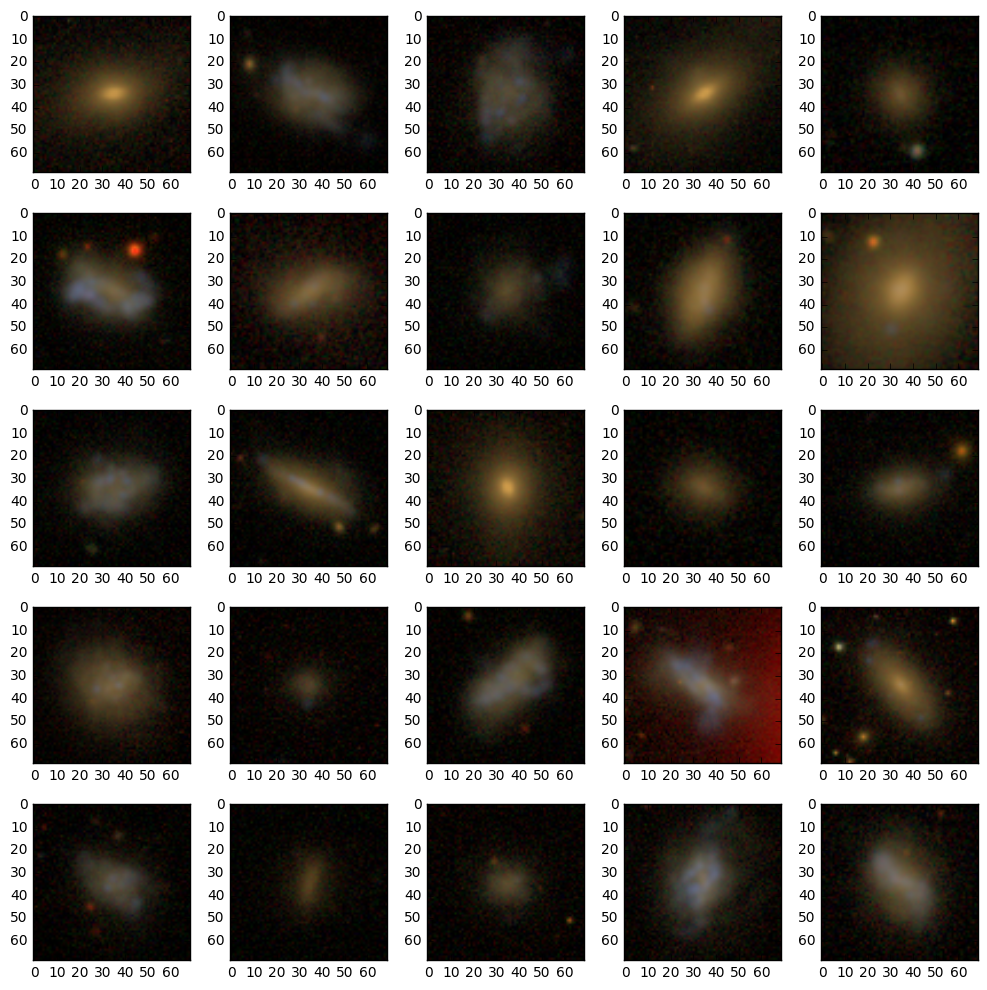

In [9]:
figure = plt.figure(figsize=(10, 10))
for index, imageDatum in enumerate(imageCube[250:500:10,:,:,:]) :
    figure.add_subplot(5,5,index+1)
    #imageDatum = np.roll(imageDatum, axis=0, shift=1)
    imageDatum = np.moveaxis(a=imageDatum, source=0, destination=-1)
    plt.imshow(imageDatum/256.0)

plt.tight_layout()

## Use the CNN to classify the images

In [10]:
cnnPrediction = run(repoBaseDir + '/IllustrisConvNet/Data', len(combinedDataFrame.index.values))

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


17047/17047 [==============================] - 205s   


In [11]:
cnnPredictionFrame = pd.DataFrame(cnnPrediction, columns=['smooth','features','artifact'])
display(cnnPredictionFrame)

,smooth,features,artifact
0,NaN,NaN,NaN
1,0.885431,0.060178,0.054391
2,0.758129,0.181677,0.060194
3,0.669630,0.293694,0.036676
4,0.722159,0.232552,0.045288
5,0.610002,0.349758,0.040240
6,0.917043,0.014726,0.068231
7,0.230487,0.750825,0.018688
8,0.857443,0.104970,0.037587
9,0.565613,0.391651,0.042736


### Merge CNN classifications with GZ classifications

In [12]:
orderedGZClassifications['halo_id'] = pd.to_numeric(orderedGZClassifications['halo_id'], downcast='integer')
cnnGzCombinedFrame = cnnPredictionFrame.merge(orderedGZClassifications, how='left', left_index=True, right_index=True)
display(cnnGzCombinedFrame.sort_values(by=['halo_id'])[['halo_id', 'file_basename', 'image_basename', 'priority']])

,halo_id,file_basename,image_basename,priority
85,51811,synthetic_image_51811_camera_3_bg_0,NaN,NaN
411,51811,synthetic_image_51811_camera_0_bg_2,NaN,NaN
134,51811,synthetic_image_51811_camera_1_bg_2,NaN,NaN
1183,51811,synthetic_image_51811_camera_2_bg_3,NaN,NaN
628,51811,synthetic_image_51811_camera_2_bg_0,NaN,NaN
513,51811,synthetic_image_51811_camera_1_bg_3,NaN,NaN
1137,51811,synthetic_image_51811_camera_3_bg_2,NaN,NaN
1074,51811,synthetic_image_51811_camera_1_bg_0,NaN,NaN
24,51811,synthetic_image_51811_camera_2_bg_1,NaN,NaN
1446,51811,synthetic_image_51811_camera_2_bg_2,NaN,NaN


### Merge combined classifications with simulated halo data

In [13]:
illustrisHaloDataFile = open(repoBaseDir + '/SloanIllustrisNotebooks/illustrisWebService_haloData.pkl', mode='rb')
illustrisHaloDataFrame = pickle.load(illustrisHaloDataFile)
illustrisHaloDataFrame.reset_index(inplace=True)
cnnGzCombinedIllustrisFrame = cnnGzCombinedFrame.merge(illustrisHaloDataFrame, how='left', left_on='halo_id', right_on='id', suffixes=['_gzDatabase', '_illustrisWeb'])

hubbleH = 0.74
cnnGzCombinedIllustrisFrame['mass_stars_solar_units'] = np.log10(10**10*cnnGzCombinedIllustrisFrame["mass_stars"]/hubbleH)
cnnGzCombinedIllustrisFrame['massinrad_stars_solar_units'] = np.log10(10**10*cnnGzCombinedIllustrisFrame["massinrad_stars"]/hubbleH)
cnnGzCombinedIllustrisFrame['massinhalfrad_stars_solar_units'] = np.log10(10**10*cnnGzCombinedIllustrisFrame["massinhalfrad_stars"]/hubbleH)

#print(illustrisHaloDataFrame.loc[86235])

## Generate distribution plots

fixed_mass          22814
first_fixed_mass     1428
fixed_view            978
Name: priority, dtype: int64


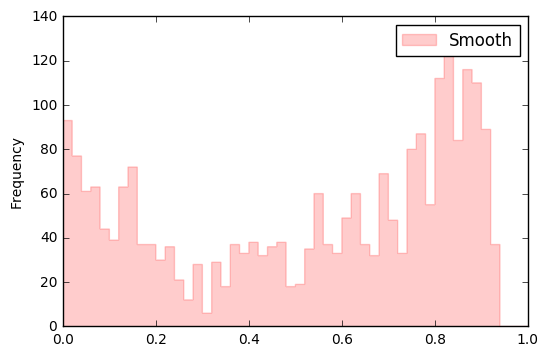

In [26]:
print(cnnGzCombinedIllustrisFrame['priority'].value_counts())
selection = (cnnGzCombinedIllustrisFrame['priority'] == 'first_fixed_mass') | (cnnGzCombinedIllustrisFrame['priority'] == 'fixed_view')
axes = cnnGzCombinedIllustrisFrame[selection]['smooth'].plot.hist(bins=50, range=(0,1), histtype='step', ec='r', fc='r', fill=True, alpha=0.2)
#axes = cnnGzCombinedIllustrisFrame[selection]['features'].plot.hist(bins=50, range=(0,1), histtype='step', ec='b', fc='b', fill=True, alpha=0.2)
#axes = cnnPredictionFrame['artifact'].plot.hist(bins=100, range=(0,1), histtype='step', ec='g',fc='g', fill=True, alpha=0.2)
lines, labels = axes.get_legend_handles_labels()
labels = [ 'Smooth', 'Features']#, 'Artifact']
axes.legend(lines, labels)

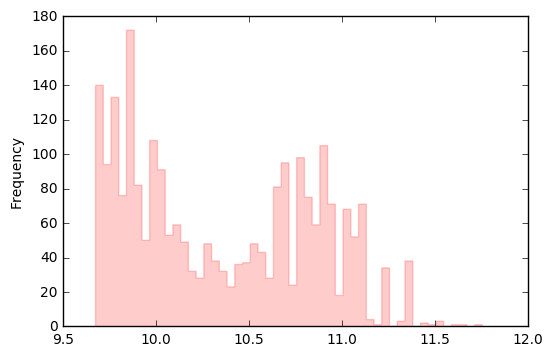

In [27]:
axes = cnnGzCombinedIllustrisFrame[selection]['massinhalfrad_stars_solar_units'].plot.hist(bins=50, histtype='step', ec='r', fc='r', fill=True, alpha=0.2)

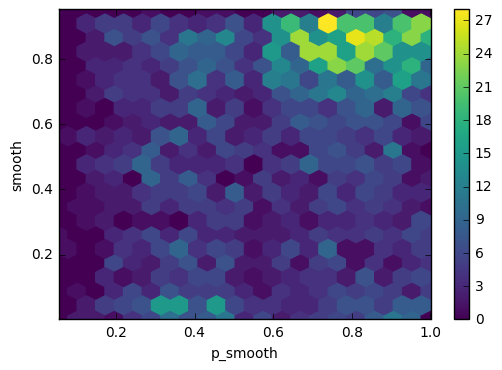

In [16]:
axes = cnnGzCombinedFrame.dropna().plot.hexbin(y='smooth', x='p_smooth', gridsize=20, sharex=False, cmap='viridis')

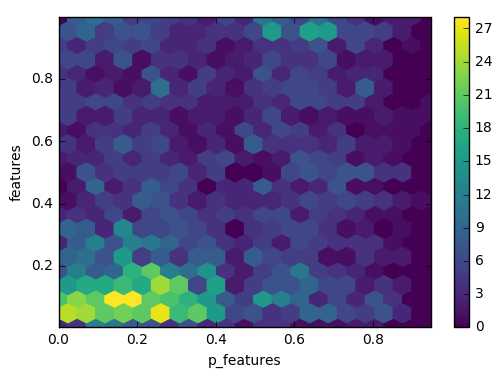

In [17]:
axes = cnnGzCombinedFrame.dropna().plot.hexbin(y='features', x='p_features', gridsize=20, sharex=False, cmap='viridis')

## Examine galaxy images for which the CNN yields high smooth or features probabilities.

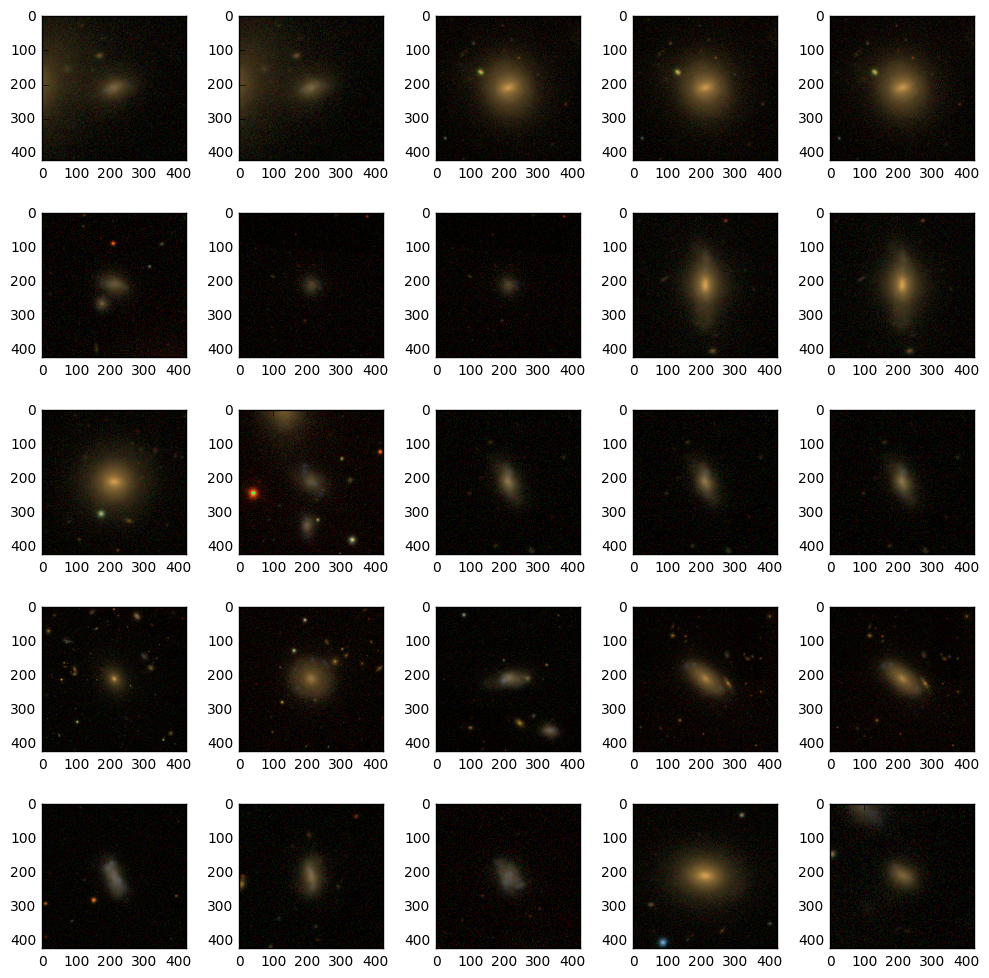

In [18]:
#print(cnnGzCombinedIllustrisFrame.columns.values)
figure = plt.figure(figsize=(10, 10))
for index, filePath in enumerate(cnnGzCombinedIllustrisFrame[(cnnGzCombinedIllustrisFrame['smooth'] > 0.7)]['file_path'][250:500:10]) :
    figure.add_subplot(5,5,index+1)
    #imageDatum = np.roll(imageDatum, axis=0, shift=1)
    imageDatum = plt.imread(filePath)
    plt.imshow(imageDatum)

plt.tight_layout()